# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [2]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [3]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

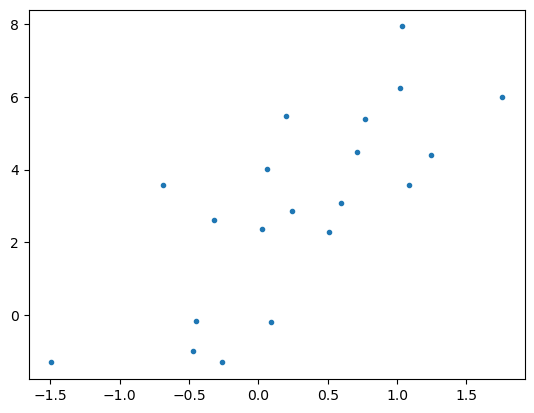

In [4]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [14]:
# 划分训练集和测试集
X_train = X[:15]
Y_train = Y[:15]
X_test = X[15:]
Y_test = Y[15:]

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [15]:
# 导入模块
from sklearn.metrics import mean_squared_error

In [16]:
# 计算训练集数据
for i in range(1,5): 
    theta = np.polyfit(X_train, Y_train, i)
    Y_train_pred = np.polyval(theta,X_train)
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    print("第%d次多项式函数的MSE为 : %.3f" % (i, mse_train))

第1次多项式函数的MSE为 : 3.614
第2次多项式函数的MSE为 : 3.471
第3次多项式函数的MSE为 : 3.010
第4次多项式函数的MSE为 : 2.397


4次多项式拟合Mse最小，4次多项式与训练数据的拟合效果最好

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

In [18]:
# 计算测试集数据
for i in range(1,5): 
    theta = np.polyfit(X_train, Y_train, i)
    Y_test_pred = np.polyval(theta, X_test)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    print("第%d次多项式函数的MSE为 : %.3f" % (i, mse_test))

第1次多项式函数的MSE为 : 1.937
第2次多项式函数的MSE为 : 6.925
第3次多项式函数的MSE为 : 145.538
第4次多项式函数的MSE为 : 2717.500


1次多项式的MSE最小，1次多项式函数与测试数据的拟合效果最好

1.2和1.3的答案是否相同？两者的异同有什么意义？

两题答案不同。
在训练集拟合数据时，高次函数Mse可能很小，但是可能过度考虑了每个数据的重要性，导致模型的泛化能力很差，因此对测试集的拟合效果很差
综合两个问题的结果，我们可以选择出泛化能力较强，拟合程度又高的模型

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

In [ ]:
ReLU(x) = max(0, x)
#Sigmoid计算公式：
Sigmoid(x) = 1 / (1 + exp(-x))
#设输入为x，第一层的权重为W1，偏置为b1，第二层的权重为W2，偏置为b2。
z1 = x.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
y_pred = relu(z2)

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [18]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [20]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [21]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [23]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [25]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [27]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [29]:
b2 = np.array([[0.277288]])

### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [28]:
import numpy as np

# 定义ReLU函数
def relu(x):
    return np.maximum(0, x)

# 定义Sigmoid函数
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid

# 正向传播计算预测值Y_pred
z1 = X.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
Y_pred = relu(z2)

# 计算均方差损失值L
L = np.mean((Y - Y_pred) ** 2)

# 计算W1、W2、b1和b2的偏导数
dL_dY_pred = -2 * (Y - Y_pred) / len(Y)
dY_pred_dz2 = np.where(z2 > 0, 1, 0)
dL_dz2 = dL_dY_pred * dY_pred_dz2
dL_da1 = dL_dz2.dot(W2.T)
da1_dz1 = sigmoid(z1) * (1 - sigmoid(z1))
dL_dz1 = dL_da1 * da1_dz1
# 计算W1的偏导数
dL_dW1 = X.T.dot(dL_dz1)
# 计算b1的偏导数
dL_db1 = np.sum(dL_dz1, axis=0)
# 计算W2的偏导数
dL_dW2 = a1.T.dot(dL_dz2)
# 计算b2的偏导数
dL_db2 = np.sum(dL_dz2, axis=0)


print(f"预测值为：{Y_pred.reshape(1,4)}")
print(f"损失值为：{L}")
print(f"W1的偏导数为：{dL_dW1.reshape(1,-1)}")
print(f"B1的偏导数为：{dL_db1.reshape(1,-1)}")
print(f"W1的偏导数为：{dL_dW2.reshape(1,-1)}")
print(f"B2的偏导数为：{dL_db2.reshape(1,-1)}")


预测值为：[[2.18514844 1.35081552 2.09965131 1.98338406]]
损失值为：2.80688883177308
W1的偏导数为：[[-0.10062818 -0.00045547  0.01227741 -0.12888547 -0.04684264  0.16104007
  -0.00277893  0.20342634  0.06970365  0.14329457]]
B1的偏导数为：[[ 0.45340951 -0.00683274  0.54292804  0.35971905  0.52730517]]
W1的偏导数为：[[1.20554195 1.33518175 0.66155887 2.42607152 1.0643283 ]]
B2的偏导数为：[[2.93620659]]
